# Проект "Мобильные приложения"

Целью данного исследования является обнаружение характеристик поведения пользователей приложения, которые могут быть использоваы в совершенствовании приложения

In [139]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import math as mth
import warnings
from datetime import datetime, timedelta

In [140]:
df_2= pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv')

In [141]:
df=pd.read_csv('https://code.s3.yandex.net//datasets/mobile_dataset.csv')

In [142]:
df.columns=['event_time','event_name','user_id']
df_2.columns=['user_id','source']

In [143]:
df

,event_time,event_name,user_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


In [144]:
df

,event_time,event_name,user_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


In [145]:
df_2

,user_id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,yandex
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,yandex
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,yandex
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex


#### Предобработка данных

In [146]:
print('\nЧисло дубликатов:', df.duplicated().sum())


Число дубликатов: 0


In [147]:
df.drop_duplicates(inplace=True)

In [148]:
# Наличие пропусков
df.isna().sum()

event_time    0
event_name    0
user_id       0
dtype: int64


In [149]:
# приведем столбец к формату даты
df['event_time']=pd.to_datetime(df['event_time'])

In [150]:
df['date']  = df['event_time'].dt.date

In [151]:
df['event_name'].unique() 

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

In [152]:
df['event_time'] = df['event_time'].dt.strftime("%Y-%m-%d %H:%M:%S")

In [153]:
df['event_time'] = pd.to_datetime(df['event_time'], format='%Y-%m-%d %H:%M:%S')

In [154]:
df['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

In [155]:
min(df['date']) #минимальная дата 

datetime.date(2019, 10, 7)

In [156]:
max(df['date']) #максимальная дата

datetime.date(2019, 11, 3)

In [157]:
df= df.merge(df_2, on='user_id', how='left')

In [158]:
def replace(row):
    if row == 'contacts_show':
        return 'contacts_show'
    elif row == 'show_contacts':
        return 'contacts_show'
    elif row in ['search_1', 'search_2','search_3','search_4','search_5','search_6','search_7']:
        return 'search'
    else:
        return row
df['event_name'] = df['event_name'].apply(replace)

In [159]:
df = df.sort_values(by=['user_id', 'event_time'])
df

,event_time,event_name,user_id,date,source
805,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other
806,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other
809,2019-10-07 13:41:05,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other
820,2019-10-07 13:43:20,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other
830,2019-10-07 13:45:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other
...,...,...,...,...,...
72584,2019-11-03 15:51:23,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google
72589,2019-11-03 15:51:57,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google
72684,2019-11-03 16:07:40,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google
72688,2019-11-03 16:08:18,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google


In [160]:
#определим разницу 30 минут для каждой группы с кумулятивной суммой
g = (df.groupby('user_id')['event_time'].diff() > pd.Timedelta('30Min')).cumsum()
# создаем счетчик групп
df['session_id'] = df.groupby(['user_id', g], sort=False).ngroup() + 1
df.tail(5)

,event_time,event_name,user_id,date,source,session_id
72584,2019-11-03 15:51:23,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368
72589,2019-11-03 15:51:57,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368
72684,2019-11-03 16:07:40,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368
72688,2019-11-03 16:08:18,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368
72689,2019-11-03 16:08:25,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368


In [161]:
first_activity_date =df.groupby(['user_id'])['date'].min()
first_activity_date.name = 'first_activity_date'
user_activity = df.join(first_activity_date,on='user_id')

In [162]:
user_activity

,event_time,event_name,user_id,date,source,session_id,first_activity_date
805,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07
806,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07
809,2019-10-07 13:41:05,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07
820,2019-10-07 13:43:20,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07
830,2019-10-07 13:45:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07
...,...,...,...,...,...,...,...
72584,2019-11-03 15:51:23,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368,2019-10-12
72589,2019-11-03 15:51:57,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368,2019-10-12
72684,2019-11-03 16:07:40,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368,2019-10-12
72688,2019-11-03 16:08:18,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368,2019-10-12


In [163]:
user_activity['lifetime'] = (user_activity['date'] - user_activity['first_activity_date']).dt.days
print(user_activity[['date', 'first_activity_date', 'lifetime']])

             date first_activity_date  lifetime
805    2019-10-07          2019-10-07         0
806    2019-10-07          2019-10-07         0
809    2019-10-07          2019-10-07         0
820    2019-10-07          2019-10-07         0
830    2019-10-07          2019-10-07         0
...           ...                 ...       ...
72584  2019-11-03          2019-10-12        22
72589  2019-11-03          2019-10-12        22
72684  2019-11-03          2019-10-12        22
72688  2019-11-03          2019-10-12        22
72689  2019-11-03          2019-10-12        22

[74197 rows x 3 columns]


In [164]:
user_activity

,event_time,event_name,user_id,date,source,session_id,first_activity_date,lifetime
805,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07,0
806,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07,0
809,2019-10-07 13:41:05,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07,0
820,2019-10-07 13:43:20,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07,0
830,2019-10-07 13:45:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07,0
...,...,...,...,...,...,...,...,...
72584,2019-11-03 15:51:23,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368,2019-10-12,22
72589,2019-11-03 15:51:57,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368,2019-10-12,22
72684,2019-11-03 16:07:40,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368,2019-10-12,22
72688,2019-11-03 16:08:18,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368,2019-10-12,22


In [165]:
#Создадим таблицу с сессиями
session_s = df.groupby(['session_id']).agg({'event_time':'min'})
session_s

,event_time
session_id,
1,2019-10-07 13:39:45
2,2019-10-09 18:33:55
3,2019-10-21 19:52:30
4,2019-10-22 11:18:14
5,2019-10-19 21:34:33
...,...
10364,2019-11-02 01:16:48
10365,2019-11-02 18:01:27
10366,2019-11-02 19:25:53


In [166]:
session_e = df.groupby(['session_id']).agg({'event_time':'max'})
session_e

,event_time
session_id,
1,2019-10-07 13:49:41
2,2019-10-09 18:42:22
3,2019-10-21 20:07:30
4,2019-10-22 11:30:52
5,2019-10-19 21:59:54
...,...
10364,2019-11-02 01:16:48
10365,2019-11-02 18:17:41
10366,2019-11-02 19:30:50


In [167]:
session = df.merge(session_s,
                        on='session_id',
                        how='left', 
                        sort=True)


In [168]:
session

,event_time_x,event_name,user_id,date,source,session_id,event_time_y
0,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07 13:39:45
1,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07 13:39:45
2,2019-10-07 13:41:05,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07 13:39:45
3,2019-10-07 13:43:20,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07 13:39:45
4,2019-10-07 13:45:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07 13:39:45
...,...,...,...,...,...,...,...
74192,2019-11-03 15:51:23,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368,2019-11-03 15:36:01
74193,2019-11-03 15:51:57,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368,2019-11-03 15:36:01
74194,2019-11-03 16:07:40,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368,2019-11-03 15:36:01
74195,2019-11-03 16:08:18,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368,2019-11-03 15:36:01


In [169]:
session= session.merge(session_e, 
                              on='session_id', 
                              how='left',
                              sort=True)

In [170]:
session.columns=['event_time','event_name','user_id','date','source','session_id','session_start','session_end']

In [171]:
session

,event_time,event_name,user_id,date,source,session_id,session_start,session_end
0,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07 13:39:45,2019-10-07 13:49:41
1,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07 13:39:45,2019-10-07 13:49:41
2,2019-10-07 13:41:05,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07 13:39:45,2019-10-07 13:49:41
3,2019-10-07 13:43:20,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07 13:39:45,2019-10-07 13:49:41
4,2019-10-07 13:45:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1,2019-10-07 13:39:45,2019-10-07 13:49:41
...,...,...,...,...,...,...,...,...
74192,2019-11-03 15:51:23,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368,2019-11-03 15:36:01,2019-11-03 16:08:25
74193,2019-11-03 15:51:57,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368,2019-11-03 15:36:01,2019-11-03 16:08:25
74194,2019-11-03 16:07:40,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368,2019-11-03 15:36:01,2019-11-03 16:08:25
74195,2019-11-03 16:08:18,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10368,2019-11-03 15:36:01,2019-11-03 16:08:25


In [172]:
session = session[['user_id','date',
                         'session_id', 
                         'source',
                         'session_start', 
                         'session_end']]

In [173]:
session= (session
                .drop_duplicates()
                .reset_index(drop=True))

In [174]:
#session['lifetime'] = (session['date'] - session['first_activity_date']).dt.days

In [175]:
session

,user_id,date,session_id,source,session_start,session_end
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1,other,2019-10-07 13:39:45,2019-10-07 13:49:41
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2,other,2019-10-09 18:33:55,2019-10-09 18:42:22
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,3,other,2019-10-21 19:52:30,2019-10-21 20:07:30
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,4,other,2019-10-22 11:18:14,2019-10-22 11:30:52
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,5,yandex,2019-10-19 21:34:33,2019-10-19 21:59:54
...,...,...,...,...,...,...
10417,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02,10364,google,2019-11-02 01:16:48,2019-11-02 01:16:48
10418,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02,10365,google,2019-11-02 18:01:27,2019-11-02 18:17:41
10419,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02,10366,google,2019-11-02 19:25:53,2019-11-02 19:30:50
10420,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,10367,google,2019-11-03 14:32:55,2019-11-03 14:48:44


In [176]:
session['time_spent']= session ['session_end']-session['session_start']

In [177]:
session = session.merge(first_activity_date,
                        on='user_id',
                        how='left', 
                        sort=True)

In [178]:
session

,user_id,date,session_id,source,session_start,session_end,time_spent,first_activity_date
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1,other,2019-10-07 13:39:45,2019-10-07 13:49:41,0 days 00:09:56,2019-10-07
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2,other,2019-10-09 18:33:55,2019-10-09 18:42:22,0 days 00:08:27,2019-10-07
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,3,other,2019-10-21 19:52:30,2019-10-21 20:07:30,0 days 00:15:00,2019-10-07
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,4,other,2019-10-22 11:18:14,2019-10-22 11:30:52,0 days 00:12:38,2019-10-07
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,5,yandex,2019-10-19 21:34:33,2019-10-19 21:59:54,0 days 00:25:21,2019-10-19
...,...,...,...,...,...,...,...,...
10417,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02,10364,google,2019-11-02 01:16:48,2019-11-02 01:16:48,0 days 00:00:00,2019-10-12
10418,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02,10365,google,2019-11-02 18:01:27,2019-11-02 18:17:41,0 days 00:16:14,2019-10-12
10419,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02,10366,google,2019-11-02 19:25:53,2019-11-02 19:30:50,0 days 00:04:57,2019-10-12
10420,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,10367,google,2019-11-03 14:32:55,2019-11-03 14:48:44,0 days 00:15:49,2019-10-12


In [179]:
session['time_spent']=session['time_spent'].dt.total_seconds()//60

In [180]:
#создадим таблицу с профилями
profiles = (
        session.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'source': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
profiles

,user_id,first_ts,source
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,other
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33,yandex
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35,yandex
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:05,google
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41,yandex
...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13 16:11:27,yandex
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:32:49,yandex
4290,ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23 11:51:35,google
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-21 16:39:33,yandex


In [181]:
profiles['dt'] = profiles['first_ts'].dt.date

In [182]:
profiles['dt'] = profiles['first_ts'].dt.date
profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

In [183]:
new_users = (
        profiles.groupby(['dt', 'source'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index())

In [184]:
profiles  = profiles.merge(new_users, on=['dt', 'source'], how='left')

In [185]:
profiles

,user_id,first_ts,source,dt,month,unique_users
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,other,2019-10-07,2019-10-01,58
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33,yandex,2019-10-19,2019-10-01,69
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35,yandex,2019-11-01,2019-11-01,45
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:05,google,2019-10-18,2019-10-01,43
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41,yandex,2019-10-25,2019-10-01,74
...,...,...,...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13 16:11:27,yandex,2019-10-13,2019-10-01,81
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:32:49,yandex,2019-10-07,2019-10-01,90
4290,ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23 11:51:35,google,2019-10-23,2019-10-01,57
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-21 16:39:33,yandex,2019-10-21,2019-10-01,70


Датафрейм был проверен на наличие дубликатов и пропусков. Столбец даты и времени был приведен к правильному формату, создан столбец даты событий, заменены дублирующиеся названия событий, создан столбец с временем первого события, создан столбец с номерами сессий. Созданы датафреймы с сессиями и профилями пользователей.

#### Исследовательский анализ данных 

In [186]:
ignore_horizon = False

In [187]:
# задаём момент и горизонт анализа данных
observation_date = datetime(2019, 11, 3).date()
horizon_days = 7

# создаём опцию «игнорировать горизонт»
ignore_horizon = False

In [188]:
# рассчитываем максимально возможную дату привлечения
last_suitable_acquisition_date = observation_date
if not ignore_horizon:
    last_suitable_acquisition_date = observation_date - timedelta(
        days=horizon_days - 1
    )

# исключаем пользователей, пришедших после максимальной даты привлечения
result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

result_raw

,user_id,first_ts,source,dt,month,unique_users
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,other,2019-10-07,2019-10-01,58
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33,yandex,2019-10-19,2019-10-01,69
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:05,google,2019-10-18,2019-10-01,43
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41,yandex,2019-10-25,2019-10-01,74
5,00554293-7e00-4122-b898-4e892c4a7c53,2019-10-27 12:32:28,yandex,2019-10-27,2019-10-01,60
...,...,...,...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13 16:11:27,yandex,2019-10-13,2019-10-01,81
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:32:49,yandex,2019-10-07,2019-10-01,90
4290,ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23 11:51:35,google,2019-10-23,2019-10-01,57
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-21 16:39:33,yandex,2019-10-21,2019-10-01,70


#### retention rate

In [189]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):


    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby('dt')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on='dt', how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes
    
    

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped

In [190]:
retention_raw, retention = get_retention(
    profiles, session, observation_date, horizon_days, ignore_horizon
)

In [191]:
df = df.merge(first_activity_date,
                        on='user_id',
                        how='left', 
                        sort=True)

In [192]:
retention

,cohort_size,0,1,2,3,4,5,6
dt,,,,,,,,
2019-10-07,204,1.0,0.117647,0.093137,0.107843,0.053922,0.034314,0.058824
2019-10-08,167,1.0,0.161677,0.125749,0.053892,0.041916,0.065868,0.053892
2019-10-09,176,1.0,0.073864,0.062500,0.056818,0.068182,0.068182,0.056818
2019-10-10,174,1.0,0.086207,0.103448,0.080460,0.091954,0.080460,0.068966
2019-10-11,136,1.0,0.088235,0.117647,0.095588,0.088235,0.073529,0.066176
2019-10-12,125,1.0,0.120000,0.160000,0.056000,0.064000,0.088000,0.080000
2019-10-13,148,1.0,0.128378,0.067568,0.054054,0.067568,0.054054,0.054054
2019-10-14,185,1.0,0.113514,0.102703,0.102703,0.081081,0.070270,0.048649
2019-10-15,186,1.0,0.134409,0.086022,0.075269,0.053763,0.053763,0.080645


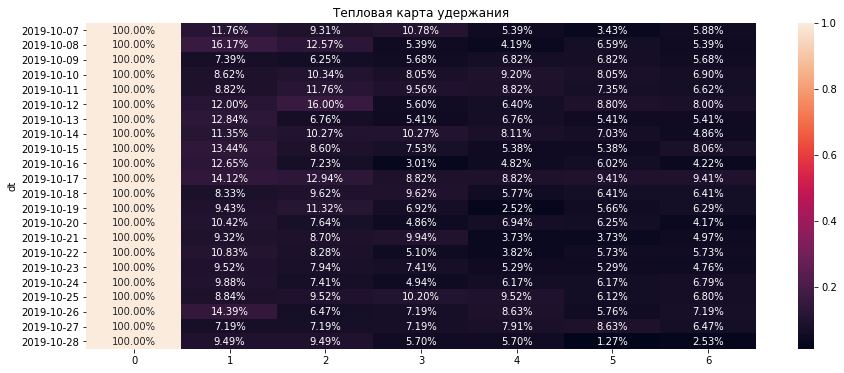

In [193]:
# строим хитмэп

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_size']),  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.show()

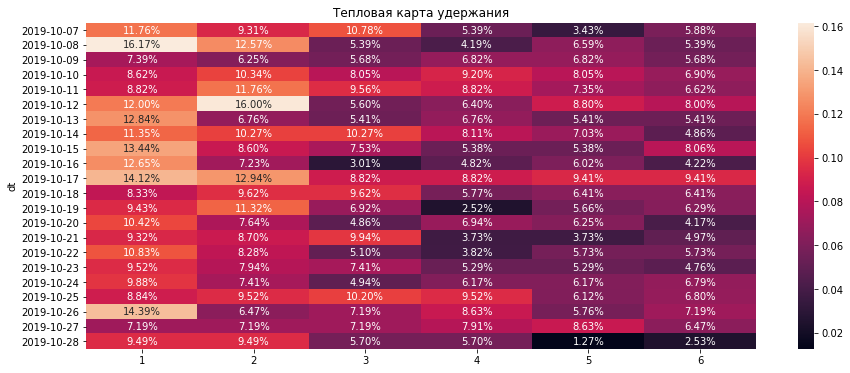

In [194]:
# строим хитмэп без нулевого лайфтайма

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.show()

In [195]:
retention.loc[:, 6].mean()

0.0602518768598611

Самое большое удержание - у когорт от 2019-10-17(9.41% на 7 день) и 2019-10-12(8%) и 2019-10-15(8.06%). В целом, идет тенденция к понижению удержания со временем. Самое низкое удержание на заключительный день показала последняя когорта. Когорта с самым высоким удержанием - от 2019-10-17.

In [196]:
retention

,cohort_size,0,1,2,3,4,5,6
dt,,,,,,,,
2019-10-07,204,1.0,0.117647,0.093137,0.107843,0.053922,0.034314,0.058824
2019-10-08,167,1.0,0.161677,0.125749,0.053892,0.041916,0.065868,0.053892
2019-10-09,176,1.0,0.073864,0.062500,0.056818,0.068182,0.068182,0.056818
2019-10-10,174,1.0,0.086207,0.103448,0.080460,0.091954,0.080460,0.068966
2019-10-11,136,1.0,0.088235,0.117647,0.095588,0.088235,0.073529,0.066176
2019-10-12,125,1.0,0.120000,0.160000,0.056000,0.064000,0.088000,0.080000
2019-10-13,148,1.0,0.128378,0.067568,0.054054,0.067568,0.054054,0.054054
2019-10-14,185,1.0,0.113514,0.102703,0.102703,0.081081,0.070270,0.048649
2019-10-15,186,1.0,0.134409,0.086022,0.075269,0.053763,0.053763,0.080645


In [197]:
# удаление столбца cohort_size и транспонирование (переворачивание) таблицы
# с помощью атрибута T: столбцы становятся строками, а строки - столбцами
report = retention.drop(columns = ['cohort_size']).T

report

dt,2019-10-07,2019-10-08,2019-10-09,2019-10-10,2019-10-11,2019-10-12,2019-10-13,2019-10-14,2019-10-15,2019-10-16,...,2019-10-19,2019-10-20,2019-10-21,2019-10-22,2019-10-23,2019-10-24,2019-10-25,2019-10-26,2019-10-27,2019-10-28
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.117647,0.161677,0.073864,0.086207,0.088235,0.120,0.128378,0.113514,0.134409,0.126506,...,0.094340,0.104167,0.093168,0.108280,0.095238,0.098765,0.088435,0.143885,0.071942,0.094937
2,0.093137,0.125749,0.062500,0.103448,0.117647,0.160,0.067568,0.102703,0.086022,0.072289,...,0.113208,0.076389,0.086957,0.082803,0.079365,0.074074,0.095238,0.064748,0.071942,0.094937
3,0.107843,0.053892,0.056818,0.080460,0.095588,0.056,0.054054,0.102703,0.075269,0.030120,...,0.069182,0.048611,0.099379,0.050955,0.074074,0.049383,0.102041,0.071942,0.071942,0.056962
4,0.053922,0.041916,0.068182,0.091954,0.088235,0.064,0.067568,0.081081,0.053763,0.048193,...,0.025157,0.069444,0.037267,0.038217,0.052910,0.061728,0.095238,0.086331,0.079137,0.056962
5,0.034314,0.065868,0.068182,0.080460,0.073529,0.088,0.054054,0.070270,0.053763,0.060241,...,0.056604,0.062500,0.037267,0.057325,0.052910,0.061728,0.061224,0.057554,0.086331,0.012658
6,0.058824,0.053892,0.056818,0.068966,0.066176,0.080,0.054054,0.048649,0.080645,0.042169,...,0.062893,0.041667,0.049689,0.057325,0.047619,0.067901,0.068027,0.071942,0.064748,0.025316


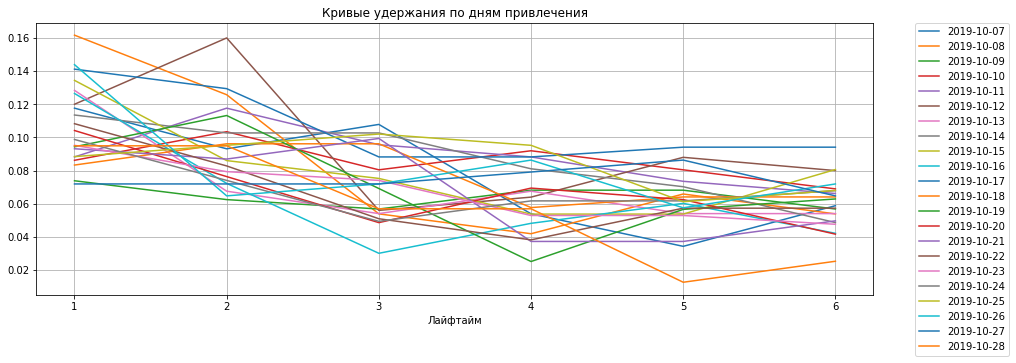

In [198]:
# строим кривые удержания

report = retention.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 5),  # размер графика
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по дням привлечения')  # название графика
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

Самое большое удержание - у когорт от 2019-10-17(9.41% на 7 день) и 2019-10-12(8%) и 2019-10-15(8.06%). В целом, идет тенденция к понижению удержания со временем. Самое низкое удержание на заключительный день показала последняя когорта. Когорта с самым высоким удержанием - от 2019-10-17. В целом, можно видеть негативную тенденцию удержания со временем.

In [199]:
session[['time_spent']].describe()

,time_spent
count,10422.000000
mean,12.634523
std,19.929660
min,0.000000
25%,0.000000
50%,5.000000
75%,17.000000
max,321.000000


Пользователи в среднем проводили 12 минут в приложении, медиана- 5 минут, максимальное количество проведенных минут за сессию - 321 минут. В общем было проведено 10422 минут

In [200]:
session_time = session.groupby('user_id')[['time_spent']].mean()
session_time        

,time_spent
user_id,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,11.000000
00157779-810c-4498-9e05-a1e9e3cedf93,32.500000
00463033-5717-4bf1-91b4-09183923b9df,24.000000
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,20.714286
00551e79-152e-4441-9cf7-565d7eb04090,3.000000
...,...
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,24.500000
ffc01466-fdb1-4460-ae94-e800f52eb136,0.000000
ffcf50d9-293c-4254-8243-4890b030b238,1.000000


array([[<AxesSubplot:title={'center':'time_spent'}>]], dtype=object)

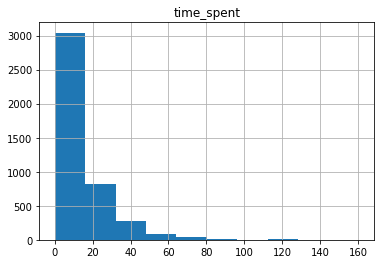

In [201]:
session_time.hist()

In [202]:

fig = px.histogram(session_time, 
             x='time_spent',
             title='Время, проведенное в среднем')

fig.update_xaxes(title_text="Время, проведенное в среднем")
fig.update_yaxes(title_text="Количество пользователей")

#### Время,проведенное в приложении

Посмотрим среднее проведенное время каждым пользователем

In [203]:
times= (session.groupby('user_id')[['time_spent']]
         .mean()
         .reset_index())

In [204]:
times

,user_id,time_spent
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,11.000000
1,00157779-810c-4498-9e05-a1e9e3cedf93,32.500000
2,00463033-5717-4bf1-91b4-09183923b9df,24.000000
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,20.714286
4,00551e79-152e-4441-9cf7-565d7eb04090,3.000000
...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,24.500000
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,0.000000
4290,ffcf50d9-293c-4254-8243-4890b030b238,1.000000
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,12.333333


In [205]:
times

,user_id,time_spent
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,11.000000
1,00157779-810c-4498-9e05-a1e9e3cedf93,32.500000
2,00463033-5717-4bf1-91b4-09183923b9df,24.000000
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,20.714286
4,00551e79-152e-4441-9cf7-565d7eb04090,3.000000
...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,24.500000
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,0.000000
4290,ffcf50d9-293c-4254-8243-4890b030b238,1.000000
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,12.333333


In [206]:
#создадим столбец с датой каждой сессии.
session['dt'] = session['session_start'].dt.date

In [207]:
fig = px.bar(session, x='dt', y='time_spent', title='Время, проведенное в приложении среднее')
fig.show() 

Создадим таблицу с суммой, средним и медианой проведенного времени

In [208]:
time_table = session.pivot_table(index='dt', values='time_spent', aggfunc=['sum', 'mean','median']).reset_index()
#time_table.columns = time_table.columns.droplevel(1)
time_table.columns=['dt','sum', 'mean','median']
time_table['dt'] = pd.to_datetime(time_table['dt'])

In [209]:
time_table

,dt,sum,mean,median
0,2019-10-07,4056.0,16.354839,7.0
1,2019-10-08,4292.0,15.274021,7.0
2,2019-10-09,3292.0,11.715302,6.0
3,2019-10-10,4032.0,13.048544,7.0
4,2019-10-11,3731.0,13.767528,6.0
5,2019-10-12,3122.0,13.515152,6.0
6,2019-10-13,4606.0,16.104895,7.0
7,2019-10-14,5241.0,13.473008,7.0
8,2019-10-15,4486.0,11.328283,4.0
9,2019-10-16,4690.0,12.506667,4.0


In [210]:
fig = px.line(time_table, 
             x='dt',
             y='sum',
             title='Проведенное время в приложении в сумме')
fig.show()

#### Частота событий

Количество событий в разрезе каждого пользователя

In [211]:
freq= df.groupby('user_id')['event_name'].count().reset_index().sort_values(by='event_name',
                           ascending=False)
freq = freq.rename(columns={'event_name':'freq'})

In [212]:
freq

,user_id,freq
3397,cb36854f-570a-41f4-baa8-36680b396370,478
3794,e13f9f32-7ae3-4204-8d60-898db040bcfc,465
2629,9ce63488-758a-481a-bcb5-a02b467e1d84,407
615,21230dd9-2f7f-4b77-a436-43d4d10388e0,400
3162,be1449f6-ca45-4f94-93a7-ea4b079b8f0f,397
...,...,...
1436,55f7dc86-a03b-4cff-adc6-61a23d4ab680,1
2139,800920e6-c654-434c-966e-8e3ebcee0d38,1
3006,b3aa5ec3-6e23-4fcf-bdcc-c0527228fd47,1
1776,6a2e7783-a775-4c7d-adf0-22d1983ce9bd,1


In [213]:

fig = px.histogram(freq, 
             x='freq',
             y=freq.index,
             histfunc='count',
             title='Количество событий в разрезе каждого пользователя')

fig.update_xaxes(title_text="Количество событий")
fig.update_yaxes(title_text="Количество пользователей")

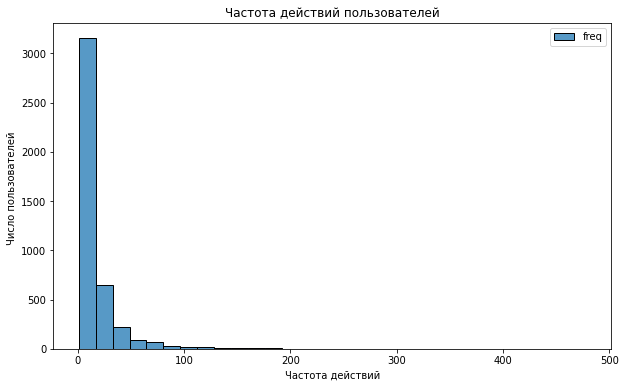

In [214]:
plt.figure(figsize=(10, 6))
sns.histplot(freq, bins=30, kde=False, color='skyblue')
plt.title('Частота действий пользователей')
plt.xlabel('Частота действий')
plt.ylabel('Число пользователей ')
plt.show()


In [215]:
freq.describe()

,freq
count,4293.000000
mean,17.283252
std,29.130677
min,1.000000
25%,5.000000
50%,9.000000
75%,17.000000
max,478.000000


Наибольшее количество событий на пользователя - 478, среднее - 17 событий, медиана - 9 событий.

In [216]:
#подсчитаем количество событий за одну сессию пользователей
sessions_one_user = df.pivot_table(index='user_id', 
               values=['event_name', 'session_id'],
               aggfunc={'event_name':'count', 'session_id':'nunique'}).reset_index()

In [217]:
sessions_one_user

,user_id,event_name,session_id
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,35,4
1,00157779-810c-4498-9e05-a1e9e3cedf93,71,6
2,00463033-5717-4bf1-91b4-09183923b9df,10,1
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,32,6
4,00551e79-152e-4441-9cf7-565d7eb04090,8,3
...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,17,2
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,7,1
4290,ffcf50d9-293c-4254-8243-4890b030b238,2,1
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,13,3


In [218]:
profiles['events_p_ses'] = sessions_one_user['event_name'] / sessions_one_user['session_id']

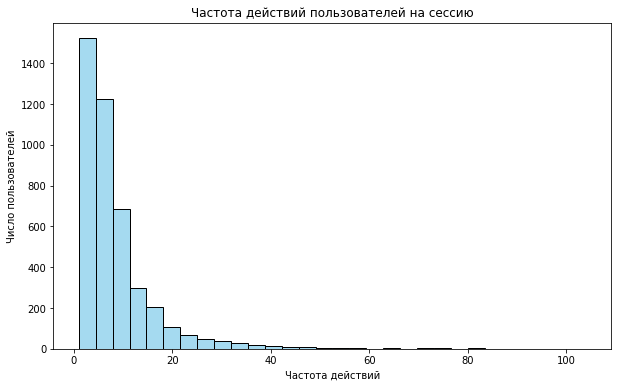

In [219]:
profiles['events_p_ses']
plt.figure(figsize=(10, 6))
sns.histplot(profiles['events_p_ses'], bins=30, kde=False, color='skyblue')
plt.title('Частота действий пользователей на сессию')
plt.xlabel('Частота действий')
plt.ylabel('Число пользователей')
plt.show()

В среднем за сессию пользователь совершает 8,29 событий. Максимальое чисто событий за сессию - 104, минимальное - 1, медиана - 6 событий.

In [220]:
#создадим визуализацию воронки событий после поиска
funnel = df.query('event_name == "search" and event_name != "tips_click" or event_name == "advert_open" or event_name == "search" or event_name == "contacts_call" or event_name == "contacts_show" or event_name == "favorites_add" or event_name == "search"')
funnel_y= funnel['event_name'].value_counts().to_frame().reset_index()['index'].to_list()
funnel_values= funnel['event_name'].value_counts().to_frame().reset_index()['event_name'].to_list()

In [221]:
fig = go.Figure(go.Funnel(
    y = funnel_y,
    x = funnel_values))
fig.update_layout(title='Воронка действий после поиска')

fig.show()

Соотношение количества событий

In [222]:
freq_e = (df.groupby('event_name')['event_time']
              .count()
              .reset_index()
              .sort_values(by='event_time',
                           ascending=False))
freq_e = freq_e.rename(columns={'event_time':'freq'})
freq_e['%'] = round(freq_e['freq'] / freq_e['freq'].sum() * 100, 2)

In [223]:
freq_e

,event_name,freq,%
8,tips_show,40055,53.98
5,photos_show,10012,13.49
6,search,6784,9.14
0,advert_open,6164,8.31
2,contacts_show,4529,6.10
4,map,3881,5.23
3,favorites_add,1417,1.91
7,tips_click,814,1.10
1,contacts_call,541,0.73


In [224]:

title='Частотность событий'

fig = px.bar(freq_e, 
             x=freq_e['event_name'],
             y=freq_e['freq'],title= 'Частота событий',
             text='%')

fig.show()

Самое частое событие - показ рекомендаций- 54%, затем показ фото - 13%, поиск и клик по рекламе - 9% и 8%. Показ контактного номера занимает лишь 6% от общего числа событий, звонок - 0,73%. от общего числа событий

In [225]:
df_copy=df.copy()

In [226]:
# отсортируем датафрейм по user_id и event_time
df_copy.sort_values(by=['user_id', 'event_time'], inplace=True)

In [227]:
# Посчитаем время между последовательными событиями
df_copy['session_duration'] = df_copy.groupby('user_id')['event_time'].diff().dt.total_seconds()

# Determine the event that occurs most frequently before the end of a session
most_common_events = df_copy[df_copy['session_duration'] < 300] # Assuming a session duration of 5 minutes
most_common_event = most_common_events['event_name'].mode()[0]

In [228]:
most_common_events['event_name'].value_counts()

tips_show        32999
photos_show       7398
advert_open       5338
search            3863
contacts_show     3521
map               2304
favorites_add     1176
tips_click         676
contacts_call      540
Name: event_name, dtype: int64

In [229]:

df['event_time'] = pd.to_datetime(df['event_time'])

# Extract the day of the week from the event_time column
df['day_of_week'] = df['event_time'].dt.day_name()

# Group the data by the day of the week and count the number of actions for each day
action_frequency_by_day = df.groupby('day_of_week').size()

# Display the frequency of actions by the days of the week
action_frequency_by_day

day_of_week
Friday        9969
Monday       11671
Saturday      9154
Sunday       10501
Thursday     10762
Tuesday      11145
Wednesday    10995
dtype: int64


Использую английские ресурсы.

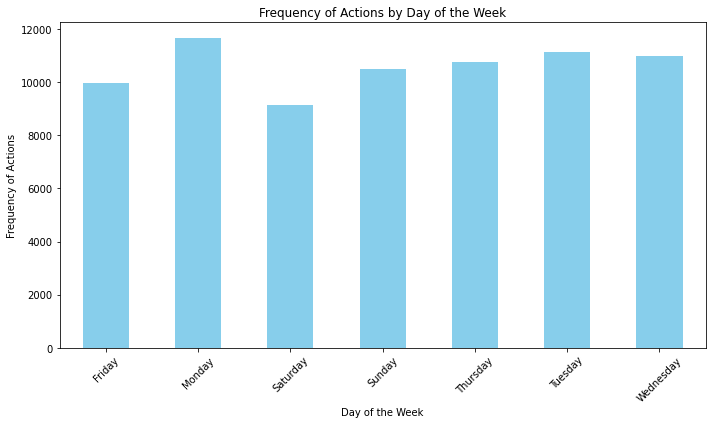

In [230]:
plt.figure(figsize=(10, 6))
action_frequency_by_day.plot(kind='bar', color='skyblue')
plt.title('Frequency of Actions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency of Actions')
plt.xticks(rotation=45)
plt.tight_layout()# развернем названия дней
plt.show()

В среднем за сессию пользователь совершает 8,29 событий. Максимальое чисто событий за сессию - 104, минимальное - 1, медиана - 6 событий. Самое частое событие - показ рекомендаций.
Приложение закрывают чаще после рекомендованных объявлений. Чаще всего юзеры пользуются приложением в понедельник, вторник и среду, реже всего - в субботу.

#### конверсия в целевое действие

In [231]:
#подсчитаем конверсию
conversion=( df[df['event_name']=='contacts_show']['user_id'].nunique()/df['user_id'].nunique())

In [232]:
conversion

0.22851153039832284

Подсчет конверсии в целевое действие по когортам

In [233]:
# Подсчитаем количество людей из каждой когорты
cohort_size = df.groupby('first_activity_date')['user_id'].nunique()

# 3. Подсчитаем количество людей из каждой когорты, использующих действие "contacts_show"
show_contact_users = df[df['event_name'] == 'contacts_show'].groupby('first_activity_date')['user_id'].nunique()

# 4. Подсчитаем конверсию для каждой когорты
conversion_rate = (show_contact_users / cohort_size) * 100

# Создадим таблицу
conversion_df = pd.DataFrame({
'cohort_size': cohort_size,
'show_contact_users': show_contact_users,
'conversion_rate': conversion_rate
})

conversion_df.reset_index(inplace=True)
#conversion_df['first_activity_date'].strftime("%B %d, %Y")
conversion_df

,first_activity_date,cohort_size,show_contact_users,conversion_rate
0,2019-10-07,204,51,25.000000
1,2019-10-08,167,39,23.353293
2,2019-10-09,176,50,28.409091
3,2019-10-10,174,41,23.563218
4,2019-10-11,136,30,22.058824
5,2019-10-12,125,30,24.000000
6,2019-10-13,148,31,20.945946
7,2019-10-14,185,37,20.000000
8,2019-10-15,186,34,18.279570
9,2019-10-16,166,30,18.072289


In [234]:
conversion_df['conversion_rate'].describe()

count    28.000000
mean     22.842708
std       3.284158
min      18.072289
25%      20.340909
50%      22.305141
75%      25.044964
max      29.629630
Name: conversion_rate, dtype: float64

Средняя конверсия по когортам - 22%, медиана - 22%, всего когорт 28. Максимальная конверсия- 28%- у когорты от 2019-10-09. Минимальная конверсия у когорты от 2019-10-16.

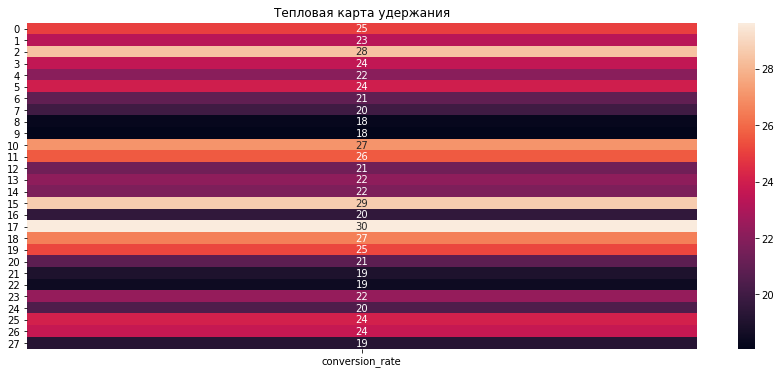

In [235]:
# строим хитмэп

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    conversion_df.drop(columns=['cohort_size','show_contact_users','first_activity_date']),  # удаляем размеры когорт
    annot=True,  # включаем подписи
      # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.show()

В целом, наблюдается негативная динамика удержания пользователей.  
Пользователи в среднем проводили 12 минут в приложении, медиана- 5 минут, максимальное количество проведенных минут за сессию - 321 минут. В общем было проведено 10422 минут
В среднем за сессию пользователь совершает 8,29 событий. Максимальое чисто событий за сессию - 104, минимальное - 1, медиана - 6 событий. Самое частое событие - показ рекомендаций. Приложение закрывают чаще после рекомендованных объявлений. Чаще всего юзеры пользуются приложением в понедельник, вторник и среду, реже всего - в субботу. Средняя конверсия по когортам - 22%, медиана - 22%, всего когорт 28. Максимальная конверсия- 28%- у когорты от 2019-10-09. Минимальная конверсия у когорты от 2019-10-16.

#### Сегментирование по количеству действий

Разделим пользователей на 3 сегмента по количеству действий. Таким образом, наименее активные пользователи попадут в Группу 1, а самые активные - в группу 3. Границы пользователей определим по квартилям. Количество действий отражает активность пользователей и, соответственно, их склонность к просмотру контактов и др.целевых событий. У пользователей с наибольшей активностью, предположительно, должны наблюдаться самая высокий уровень удержания на 7-ой день и конверсия в целевое действие- просмотр контактов. И аналогично, у самой неактивной группы должны демонстрироваться низкие удержание и конверсия.

In [236]:
# Посчитаем количество действий каждого пользователя
action_frequency = df.groupby('user_id').size()

In [237]:
action_frequency.describe()

count    4293.000000
mean       17.283252
std        29.130677
min         1.000000
25%         5.000000
50%         9.000000
75%        17.000000
max       478.000000
dtype: float64

In [238]:
# Определим границы пользователей в группах
threshold1 = action_frequency.quantile(0.33)
threshold2 = action_frequency.quantile(0.66)
group1_users = action_frequency[action_frequency <= threshold1].index
group2_users = action_frequency[(action_frequency > threshold1) & (action_frequency <= threshold2)].index
group3_users = action_frequency[action_frequency > threshold2].index

In [239]:
print("Число пользователей в Группе 1:", len(group1_users))
print("Число пользователей в Группе  2:", len(group2_users))
print("Число пользователей в Группе  3:", len(group3_users))

Число пользователей в Группе 1: 1508
Число пользователей в Группе  2: 1335
Число пользователей в Группе  3: 1450


Больше всего пользователей в самой неактивной группе 1. Самая активная группа 3- в ней 737 пользователей. В средней группе 127 человек.

In [240]:
df['segment'] = 0

#Присвоем сегменты
df.loc[df['user_id'].isin(group1_users), 'segment'] = 1
df.loc[df['user_id'].isin(group2_users), 'segment'] = 2
df.loc[df['user_id'].isin(group3_users), 'segment'] = 3

In [241]:

# Создадим 3 отдельных датафрейма для каждого сегмента
segment_1_df = df[df['segment'] == 1]
segment_2_df = df[df['segment'] == 2]
segment_3_df = df[df['segment'] == 3]


print("Сегмент 1. Датафрейм:")
print(segment_1_df.head())

print("\nСегмент 2. Датафрейм:")
segment_2_df.head()

print("\nСегмент 3 Датафрейм:")
segment_3_df.head()

Сегмент 1. Датафрейм:
             event_time     event_name                               user_id  \
167 2019-10-11 11:22:54  contacts_show  005fbea5-2678-406f-88a6-fbe9787e2268   
168 2019-10-11 11:23:00  contacts_show  005fbea5-2678-406f-88a6-fbe9787e2268   
169 2019-10-11 11:23:11  contacts_show  005fbea5-2678-406f-88a6-fbe9787e2268   
170 2019-10-11 11:29:10      tips_show  005fbea5-2678-406f-88a6-fbe9787e2268   
171 2019-10-11 11:33:42      tips_show  005fbea5-2678-406f-88a6-fbe9787e2268   

           date  source  session_id first_activity_date day_of_week  segment  
167  2019-10-11  yandex          23          2019-10-11      Friday        1  
168  2019-10-11  yandex          23          2019-10-11      Friday        1  
169  2019-10-11  yandex          23          2019-10-11      Friday        1  
170  2019-10-11  yandex          23          2019-10-11      Friday        1  
171  2019-10-11  yandex          23          2019-10-11      Friday        1  

Сегмент 2. Датафрейм:


In [242]:
df['segment'].value_counts()


3    54859
2    12575
1     6763
Name: segment, dtype: int64

In [243]:
df['segment'] = 0

# Assign segment values based on the groups of user_id
df.loc[df['user_id'].isin(group1_users), 'segment'] = 1
df.loc[df['user_id'].isin(group2_users), 'segment'] = 2
df.loc[df['user_id'].isin(group3_users), 'segment'] = 3

In [244]:
group1_users

Index(['005fbea5-2678-406f-88a6-fbe9787e2268',
       '00653802-5ff1-4071-bc17-347fc4cef569',
       '006a32d4-ee10-40dc-b237-11e0fde81cbc',
       '006f6ced-225b-4f9c-9f17-23404bc6835f',
       '00aa4003-366b-4788-ad1f-506f2b51b8cb',
       '00af35c4-2045-4960-96b8-7fd5f1978a88',
       '00e714c6-66b9-4091-bce0-8589bd65b77c',
       '0103a07d-513f-42b9-8d91-d5891d5655fe',
       '01556e76-d389-43bd-9fc7-1a3ba9802f49',
       '01585246-7d9b-4e03-a465-095d5b891b0a',
       ...
       'fdb9adcb-a14c-47ee-bd70-e46421625405',
       'fdcf28d9-94a7-4c3e-9912-23584858c679',
       'fe3d5753-c633-4398-b3a8-b584c4d266b2',
       'fe585541-43a9-4d56-8466-718856a4d195',
       'fe898476-a038-4717-875d-b01e8cddf537',
       'fe92fa6c-7eef-484f-b31b-fa0db4e4d895',
       'febe9e0b-b804-4084-a30d-1c75550e7fa3',
       'ff1554b5-919e-40b1-90bb-ee1f7f6d5846',
       'ff24f3a3-d3fe-4d36-838a-3a29548e6c91',
       'ffcf50d9-293c-4254-8243-4890b030b238'],
      dtype='object', name='user_id', length=150

In [245]:
session['segment'] = 0

# Назначим номер сегмента каждому пользователю
session.loc[session['user_id'].isin(group1_users), 'segment'] = 1
session.loc[session['user_id'].isin(group2_users), 'segment'] = 2
session.loc[session['user_id'].isin(group3_users), 'segment'] = 3

In [246]:
session

,user_id,date,session_id,source,session_start,session_end,time_spent,first_activity_date,dt,segment
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1,other,2019-10-07 13:39:45,2019-10-07 13:49:41,9.0,2019-10-07,2019-10-07,3
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2,other,2019-10-09 18:33:55,2019-10-09 18:42:22,8.0,2019-10-07,2019-10-09,3
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,3,other,2019-10-21 19:52:30,2019-10-21 20:07:30,15.0,2019-10-07,2019-10-21,3
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,4,other,2019-10-22 11:18:14,2019-10-22 11:30:52,12.0,2019-10-07,2019-10-22,3
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,5,yandex,2019-10-19 21:34:33,2019-10-19 21:59:54,25.0,2019-10-19,2019-10-19,3
...,...,...,...,...,...,...,...,...,...,...
10417,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02,10364,google,2019-11-02 01:16:48,2019-11-02 01:16:48,0.0,2019-10-12,2019-11-02,3
10418,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02,10365,google,2019-11-02 18:01:27,2019-11-02 18:17:41,16.0,2019-10-12,2019-11-02,3
10419,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02,10366,google,2019-11-02 19:25:53,2019-11-02 19:30:50,4.0,2019-10-12,2019-11-02,3
10420,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,10367,google,2019-11-03 14:32:55,2019-11-03 14:48:44,15.0,2019-10-12,2019-11-03,3


In [247]:

segment_1_session = session[session['segment'] == 1]
segment_2_session = session[session['segment'] == 2]
segment_3_session = session[session['segment'] == 3]

# Display the first few rows of each segment DataFrame
print("Segment 1 DataFrame:")
print(segment_1_session.head())

print("\nSegment 2 DataFrame:")
print(segment_2_session.head())

print("\nSegment 3 DataFrame:")
print(segment_3_session.head())

Segment 1 DataFrame:
                                 user_id        date  session_id  source  \
23  005fbea5-2678-406f-88a6-fbe9787e2268  2019-10-11          23  yandex   
24  00653802-5ff1-4071-bc17-347fc4cef569  2019-10-21          24  google   
25  006a32d4-ee10-40dc-b237-11e0fde81cbc  2019-10-08          25  yandex   
26  006f6ced-225b-4f9c-9f17-23404bc6835f  2019-10-13          26  yandex   
35  00aa4003-366b-4788-ad1f-506f2b51b8cb  2019-10-18          35  yandex   

         session_start         session_end  time_spent first_activity_date  \
23 2019-10-11 11:22:54 2019-10-11 11:33:42        10.0          2019-10-11   
24 2019-10-21 02:08:30 2019-10-21 02:17:01         8.0          2019-10-21   
25 2019-10-08 21:24:24 2019-10-08 21:40:06        15.0          2019-10-08   
26 2019-10-13 10:21:52 2019-10-13 10:30:57         9.0          2019-10-13   
35 2019-10-18 22:23:28 2019-10-18 22:26:44         3.0          2019-10-18   

            dt  segment  
23  2019-10-11        1  
2

In [248]:
session['segment'] = 0

# Назначим номер сегмента каждому пользователю
session.loc[session['user_id'].isin(group1_users), 'segment'] = 1
session.loc[session['user_id'].isin(group2_users), 'segment'] = 2
session.loc[session['user_id'].isin(group3_users), 'segment'] = 3

In [249]:
session

,user_id,date,session_id,source,session_start,session_end,time_spent,first_activity_date,dt,segment
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1,other,2019-10-07 13:39:45,2019-10-07 13:49:41,9.0,2019-10-07,2019-10-07,3
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2,other,2019-10-09 18:33:55,2019-10-09 18:42:22,8.0,2019-10-07,2019-10-09,3
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,3,other,2019-10-21 19:52:30,2019-10-21 20:07:30,15.0,2019-10-07,2019-10-21,3
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,4,other,2019-10-22 11:18:14,2019-10-22 11:30:52,12.0,2019-10-07,2019-10-22,3
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,5,yandex,2019-10-19 21:34:33,2019-10-19 21:59:54,25.0,2019-10-19,2019-10-19,3
...,...,...,...,...,...,...,...,...,...,...
10417,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02,10364,google,2019-11-02 01:16:48,2019-11-02 01:16:48,0.0,2019-10-12,2019-11-02,3
10418,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02,10365,google,2019-11-02 18:01:27,2019-11-02 18:17:41,16.0,2019-10-12,2019-11-02,3
10419,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02,10366,google,2019-11-02 19:25:53,2019-11-02 19:30:50,4.0,2019-10-12,2019-11-02,3
10420,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,10367,google,2019-11-03 14:32:55,2019-11-03 14:48:44,15.0,2019-10-12,2019-11-03,3


In [250]:
profiles.loc[profiles['user_id'].isin(group1_users), 'segment'] = 1
profiles.loc[profiles['user_id'].isin(group2_users), 'segment'] = 2
profiles.loc[profiles['user_id'].isin(group3_users), 'segment'] = 3

In [251]:
# Создадим три датафрейма с профилями
segment_1_profiles = profiles[profiles['segment'] == 1]
segment_2_profiles = profiles[profiles['segment'] == 2]
segment_3_profiles = profiles[profiles['segment'] == 3]

print("Segment 1 DataFrame:")
print(segment_1_session.head())

print("\nSegment 2 DataFrame:")
print(segment_2_session.head())

print("\nSegment 3 DataFrame:")
print(segment_3_session.head())

Segment 1 DataFrame:
                                 user_id        date  session_id  source  \
23  005fbea5-2678-406f-88a6-fbe9787e2268  2019-10-11          23  yandex   
24  00653802-5ff1-4071-bc17-347fc4cef569  2019-10-21          24  google   
25  006a32d4-ee10-40dc-b237-11e0fde81cbc  2019-10-08          25  yandex   
26  006f6ced-225b-4f9c-9f17-23404bc6835f  2019-10-13          26  yandex   
35  00aa4003-366b-4788-ad1f-506f2b51b8cb  2019-10-18          35  yandex   

         session_start         session_end  time_spent first_activity_date  \
23 2019-10-11 11:22:54 2019-10-11 11:33:42        10.0          2019-10-11   
24 2019-10-21 02:08:30 2019-10-21 02:17:01         8.0          2019-10-21   
25 2019-10-08 21:24:24 2019-10-08 21:40:06        15.0          2019-10-08   
26 2019-10-13 10:21:52 2019-10-13 10:30:57         9.0          2019-10-13   
35 2019-10-18 22:23:28 2019-10-18 22:26:44         3.0          2019-10-18   

            dt  segment  
23  2019-10-11        1  
2

#### Retention Rate для Группы 1( самой малоактивной)

In [252]:
retention_raw1, retention1 = get_retention(
    segment_1_profiles, segment_1_session, observation_date, horizon_days, ignore_horizon
)

In [253]:
retention1

,cohort_size,0,1,2,3,4,5,6
dt,,,,,,,,
2019-10-07,52,1.0,0.000000,0.038462,0.038462,0.019231,0.000000,0.019231
2019-10-08,56,1.0,0.071429,0.000000,0.035714,0.000000,0.017857,0.000000
2019-10-09,55,1.0,0.036364,0.018182,0.054545,0.036364,0.018182,0.018182
2019-10-10,60,1.0,0.050000,0.033333,0.016667,0.016667,0.016667,0.000000
2019-10-11,41,1.0,0.024390,0.048780,0.024390,0.024390,0.000000,0.000000
2019-10-12,36,1.0,0.027778,0.138889,0.027778,0.027778,0.000000,0.000000
2019-10-13,52,1.0,0.096154,0.038462,0.000000,0.019231,0.019231,0.019231
2019-10-14,55,1.0,0.072727,0.018182,0.036364,0.036364,0.000000,0.018182
2019-10-15,62,1.0,0.048387,0.032258,0.048387,0.000000,0.016129,0.000000


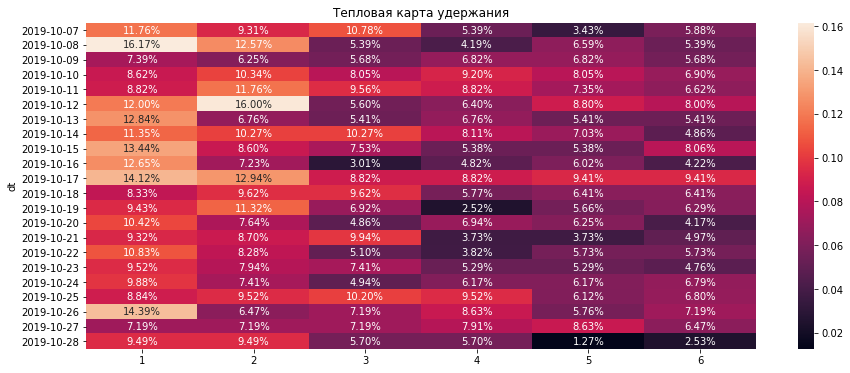

In [254]:
# строим хитмэп без нулевого лайфтайма

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.show()

In [255]:
retention1.loc[:, 6].mean()

0.011033299663791142

Retention Rate для Группы 2

In [256]:
retention_raw2, retention2 = get_retention(
    segment_2_profiles, segment_2_session, observation_date, horizon_days, ignore_horizon
)

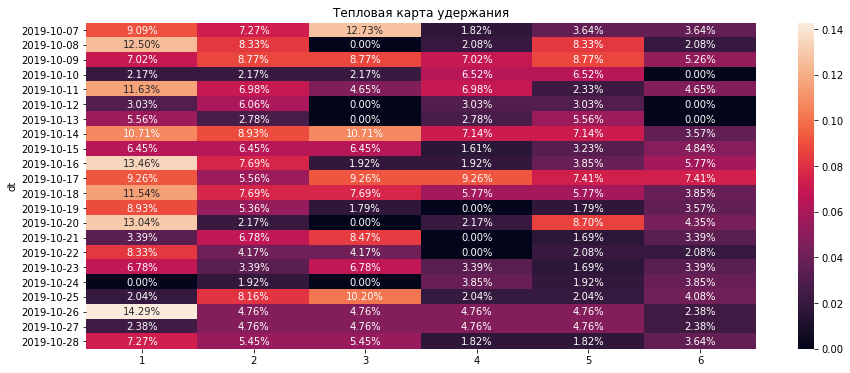

In [257]:
# строим хитмэп без нулевого лайфтайма

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    retention2.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.show()

In [258]:
retention2.loc[:, 6].mean()

0.03371602356041931

Retention Rate для Группы 3

In [259]:
retention_raw3, retention3 = get_retention(
    segment_2_profiles, segment_2_session, observation_date, horizon_days, ignore_horizon
)

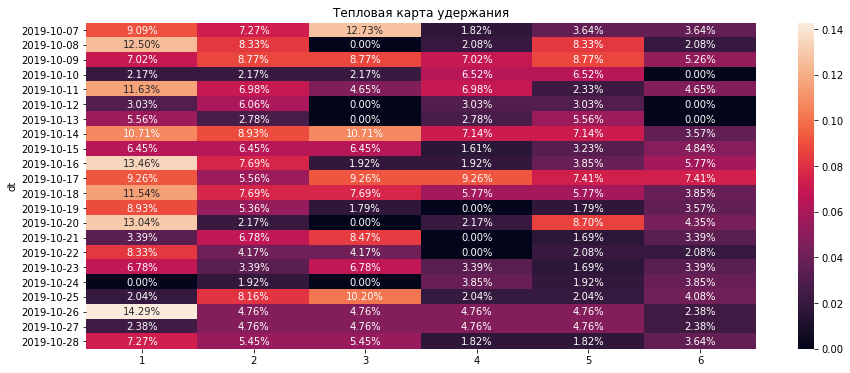

In [260]:
# строим хитмэп без нулевого лайфтайма

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    retention3.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.show()

In [261]:
retention3.loc[:, 6].mean()

0.03371602356041931

Retention Rate для сегментов - 1.1% ,3.3% и 3.3%  Как и следовало ожидать, самые активные группы- 1-ая и 2-ая - показали самый высокий retention rate.

Конверсия для группы 1

In [262]:
conversion1=( segment_1_df[segment_1_df['event_name']=='contacts_show']['user_id'].nunique()/segment_1_df['user_id'].nunique())

In [263]:
conversion1

0.15384615384615385

Конверсия для группы 2

In [264]:
conversion2=( segment_2_df[segment_2_df['event_name']=='contacts_show']['user_id'].nunique()/segment_2_df['user_id'].nunique())

In [265]:
conversion2

0.20449438202247192

Конверсия для  группы 3

In [266]:
conversion3=( segment_3_df[segment_3_df['event_name']=='contacts_show']['user_id'].nunique()/segment_3_df['user_id'].nunique())

In [267]:
conversion3

0.32827586206896553

Как и следовало ожидать, у 2 и 3 группы самая высокая конверсия - 20% и 32%. У первой группы конверсия ниже - 15%.

####  Гипотезы

Проверьте статистические гипотезы

1  Некоторые пользователи установили приложение по ссылке из yandex , другие — из google . Гипотеза: две эти группы 

демонстрируют разную конверсию в просмотры контактов.

2 Некоторые пользователи установили приложение по ссылке из yandex , другие — из google . Гипотеза: две эти группы демонстрируют

разную частоту действий.

Нулевая гипотеза:  различий в конверсии просмотра контактов между группами нет. 
Альтернативная: различия в конверсии просмотра контактов между группами есть.

In [268]:
ya= df.query('source=="yandex"')
google = df.query('source =="google"')


In [269]:
con_y=ya[ya['event_name']=='contacts_show']['user_id'].nunique()

In [270]:
total_ya= ya['user_id'].nunique()
total_g=google['user_id'].nunique()

In [271]:

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015, 
            2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785, 
            3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686, 
            1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007, 
            509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066, 
            3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255, 
            1740, 2596]

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


In [272]:
con_g= google[google['event_name']=='contacts_show']['user_id'].nunique()

In [273]:
alpha = 0.05  # критический уровень статистической значимости

contacts = np.array([con_y, con_g])
total = np.array([total_ya, total_g])

p1 = contacts[0] / total[0]
p2 = contacts[1] / total[1]

p_combined = (contacts[0] + contacts[1]) / (total[0] + total[1])
diff = p1 - p2

z_value = diff / mth.sqrt(p_combined * (1 - p_combined) * (1/total[0] + 1/total[1])) 

distr = st.norm(0, 1)# ваш код

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('Конверсия пользователей Yandex:', p1)
print('Конверсия пользователей Google:', p2)
print('p-значение: ', p_value)

if p_value < alpha:# ваш код
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

Конверсия пользователей Yandex: 0.24715615305067218
Конверсия пользователей Google: 0.24357838795394154
p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Нам нужно проверить гипотезы о равенстве среднего двух генеральных совокупностей. Выборки генеральных совокупностей достаточно велики и относительно равны. Для этого мы используем ttest_ind().

In [274]:
action_frequency_ya = ya.groupby('user_id').size().reset_index()

In [275]:
action_frequency_g = google.groupby('user_id').size().reset_index()

In [276]:

sample_1 = action_frequency_ya[0]
sample_2 = action_frequency_g[0]

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.7452511266862527
Не получилось отвергнуть нулевую гипотезу


Вывод

Было проведено исследование поведения пользователей мобильного приложения "Ненужные вещи". 

Была проведена сегментация пользователей. Пользователи были разделены на три сегмента по количеству действий пользователей. Этот признак хорошо отражает активность аудитории.  Количество действий отражает активность пользователей и, соответственно, их склонность к просмотру контактов и других целевых событий. Первая группа,наименее активная, как и следовало ожидать, показала самый низкий коэффициент удержания. Вторая и третья группы показали одинаковый коэффициент удержания. Была подсчитана конверсия для всех групп. Как и следовало ожидать, у 2 и 3 группы самая высокая конверсия - 20% и 32%. У первой группы конверсия ниже - 15%.
Были проверены 2 гипотезы. 

Первая гипотеза: Некоторые пользователи установили приложение по ссылке из yandex , другие — из google. Две эти группы демонстрируют разную конверсию в просмотры контактов. Оснований считать доли разными нет, статистически значимых различий в конверсии просмотра контактов между группами нет. 

Вторая гипотеза: Некоторые пользователи установили приложение по ссылке из yandex , другие — из google . Две эти группы демонстрируют разную частоту действий. Оснований считать доли разными также не было, статистически значимых различий в частоте действий между группами обнаружено не было. Различий между пользователями, пришедшими из yandex и из google, нет.

Рекомендации. Стоит доработать рекомендованные объявления, потому что после них пользователи чаще всего перестают пользоваться приложением.  
https://docs.google.com/presentation/d/1AiSiO-IC4PmV5HT4eyDUSGovggY8xRSiMB9AvxCrF-4/edit?usp=sharing